In [1]:
import re
import numpy as np
import pandas as pd
from math import * 
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline 

In [2]:
#for i in range(len(prices)):
    #prices[i] = prices[i].replace(',', '')
    #prices[i] = prices[i].strip('$')
    #prices[i] = float(prices[i])
   

## Calendar Data 

In [3]:
time_data = pd.read_csv('Airbnb_data/calendar.csv', delimiter=',')
time_data.drop(columns=['maximum_nights'], inplace=True)
time_data.drop(columns=['minimum_nights'], inplace=True)
time_data.head()
from sklearn.utils import shuffle
time_data=shuffle(time_data, random_state=0)


/anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
time_data


,adjusted_price,available,date,listing_id,price
8931704,NaN,t,2019-10-29,21253564,$36.00
578301,NaN,t,2019-02-13,10542140,$350.00
14445766,$64.00,f,2019-10-08,31101954,$64.00
6885269,NaN,t,2018-07-02,21796886,$674.00
22966912,NaN,f,2019-07-30,16896717,NaN
2046876,NaN,f,2018-12-27,27428096,NaN
892361,NaN,f,2019-03-27,16519436,NaN
16932299,NaN,f,2018-09-06,4644069,NaN
18054909,NaN,f,2019-01-11,20443029,NaN
20763435,NaN,f,2018-08-21,19457729,NaN


In [5]:
# Regex the price and generate log(price)
time_data['price'] = time_data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
time_data['log_price'] = np.log(time_data['price'].values)

In [6]:
time_data = time_data[np.isfinite(time_data['price'])]
#time_data.dropna(thresh=4)
time_data.drop(columns=['available'], inplace=True)

/anaconda2/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
time_data.size

62822905

In [8]:
# Only consider data for which there is data
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [9]:
#Still left with a reasonable amount of observations
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values


In [10]:
# Group by listing_id, then find each listing id's average price
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values

In [11]:
# log_means = grouped['log_price'].mean().values
# plt.hist(means, bins='auto')  # arguments are passed to np.histogram
# plt.title("distribution of mean price by listing_id")
# plt.show()

# plt.hist(time_data['price'], bins='auto')  # arguments are passed to np.histogram
# plt.title("distribution of mean price by listing_id")
# plt.show()

# plt.hist(log_means, bins='auto')  # arguments are passed to np.histogram
# plt.title("distribution of the mean of log(price) by listing_id")
# plt.show()

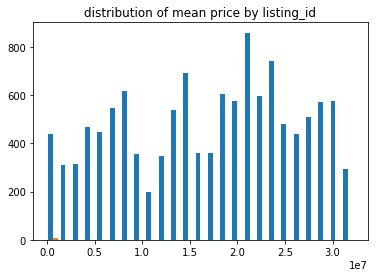

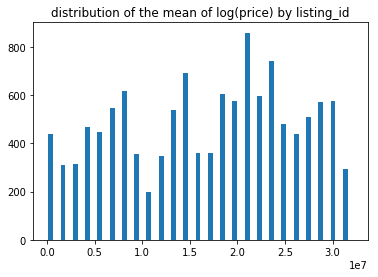

In [12]:

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values
plt.hist(means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of mean price by listing_id")
plt.show()

plt.hist(log_means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of the mean of log(price) by listing_id")
plt.show()

In [13]:
#Goals: 
# 1)Get the average price for each specific listing [done]
# 2)Compute the distance between each day's price and the average price [done]
# 3)Visualize spikes [done]
# 4)For each day, check the change in price [done]

In [14]:
# Find high demand dates by checking for positive distance between a listings average price and it's current price.
# For these purposes, high demand is categorized as a date which experienced, on average, properties being 
# priced above their average list price

In [15]:
print ("number of unique properties:", len(nan_adjusted['listing_id'].unique()))

number of unique properties: 12262


In [16]:
# Let's sort to make things easier on pattern matching algorithm
#df.sort_values(by='col1', ascending=False)
#nan_adjusted.sort_values(by=['listing_id'], inplace=True)
#time_data.sort_values(by=['listing_id'], inplace=True)

In [17]:
mean_df = grouped.mean()
#mean_df['listing_id']

In [18]:
# Maybe I need to reset the index, who the hell knows if I'll use this later
#nan_adjusted.reset_index(inplace=True)


In [19]:
time_data['price_diff'] = 0
time_data.head()

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,adjusted_price,date,listing_id,price,log_price,price_diff
8931704,NaN,2019-10-29,21253564,36.0,3.583519,0
578301,NaN,2019-02-13,10542140,350.0,5.857933,0
14445766,$64.00,2019-10-08,31101954,64.0,4.158883,0
6885269,NaN,2018-07-02,21796886,674.0,6.513230,0
18805783,NaN,2018-08-27,26122149,560.0,6.327937,0


In [20]:
# Initialize an empty column for the price differences 
nan_adjusted['price_diff'] = 0


In [22]:
nan_adjusted['listing_id'].count()/1000
# nan_adjusted.drop(columns=['level_0'], inplace=True)
# nan_adjusted.drop(columns=['index'], inplace=True)
nan_adjusted.reset_index(inplace=True)

nan_adjusted.head()

,index,adjusted_price,date,listing_id,price,log_price,price_diff
0,8931704,NaN,2019-10-29,21253564,36.0,3.583519,0
1,578301,NaN,2019-02-13,10542140,350.0,5.857933,0
2,14445766,$64.00,2019-10-08,31101954,64.0,4.158883,0
3,6885269,NaN,2018-07-02,21796886,674.0,6.513230,0
4,18805783,NaN,2018-08-27,26122149,560.0,6.327937,0


In [23]:
# Subset dataframe of averages for left-merge
mean_df_new = mean_df[['listing_id','price']]
mean_df_new.head()

,listing_id,price
0,3353,43.536842
1,3781,135.652268
2,5453,150.000000
3,5506,145.820660
4,6695,173.765442


In [24]:
# Left-Merge
new = nan_adjusted.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')
new.head()

,index,adjusted_price,date,listing_id,price_x,log_price,price_diff,price_y
0,8931704,NaN,2019-10-29,21253564,36.0,3.583519,0,36.000000
1,578301,NaN,2019-02-13,10542140,350.0,5.857933,0,341.440802
2,14445766,$64.00,2019-10-08,31101954,64.0,4.158883,0,59.719178
3,6885269,NaN,2018-07-02,21796886,674.0,6.513230,0,441.496583
4,18805783,NaN,2018-08-27,26122149,560.0,6.327937,0,524.989544


In [25]:
# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']
new.head()

,index,adjusted_price,date,listing_id,price_x,log_price,price_diff,price_y
0,8931704,NaN,2019-10-29,21253564,36.0,3.583519,0.000000,36.000000
1,578301,NaN,2019-02-13,10542140,350.0,5.857933,8.559198,341.440802
2,14445766,$64.00,2019-10-08,31101954,64.0,4.158883,4.280822,59.719178
3,6885269,NaN,2018-07-02,21796886,674.0,6.513230,232.503417,441.496583
4,18805783,NaN,2018-08-27,26122149,560.0,6.327937,35.010456,524.989544


In [26]:
# Convert dates to datetime
final = new.groupby(['date'], as_index = False)

dates = pd.to_datetime(new['date'].values)


In [27]:
# Add new datetime object
new['datetime'] = dates


In [28]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()
final_sums['price_x'] = new['price_x']
final_sums['price_y'] = new['price_x']

final_sums.head()

,datetime,price_diff,price_x,price_y
0,2015-10-02,7.371864,36.0,36.0
1,2015-10-03,16.953006,350.0,350.0
2,2015-10-04,3.833924,64.0,64.0
3,2015-10-05,-0.415049,674.0,674.0
4,2015-10-06,0.293709,560.0,560.0


/anaconda2/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Days When List Price Exceeded Average List Price for Individual AirBnbs')

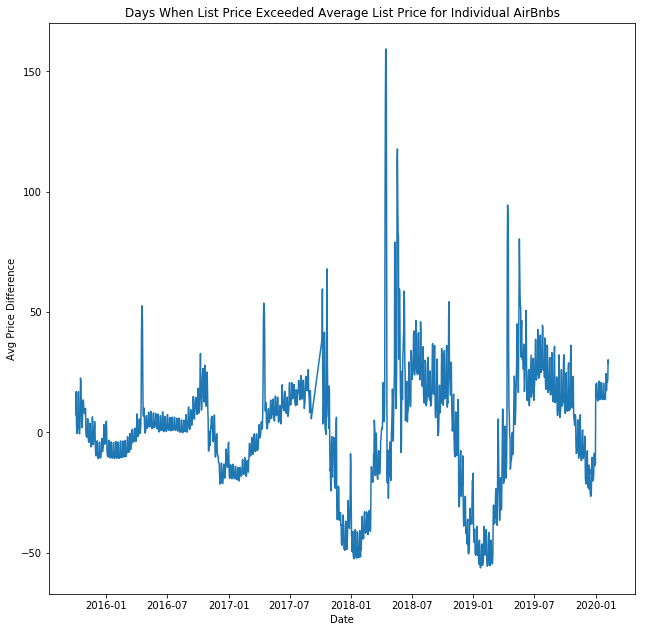

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Examine overall price difference trend
final_sums['month_year'] = final_sums['datetime'].dt.to_period('12M')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)

ax.plot(final_sums['datetime'],final_sums['price_diff'])
# ax.set_xticklabels(final_sums['month_year'] )
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')


In [30]:
# Subset the data for easier viewing 
final_sums['month_year'] = final_sums['datetime'].dt.to_period('12M')

fall = final_sums[((final_sums['month_year'] >= '2018-09') & (final_sums['month_year'] <= '2018-12'))] 
winter = final_sums[((final_sums['month_year'] >= '2018-12') | (final_sums['month_year'] <= '2018-03') & (final_sums['month_year'] >='2018-01') & (final_sums['month_year'] <='2019-01'))] 
spring = final_sums[((final_sums['month_year'] >= '2018-03') & (final_sums['month_year'] <= '2018-06'))] 
summer = final_sums[((final_sums['month_year'] >= '2018-06') & (final_sums['month_year'] <= '2018-09'))] 

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<PeriodArray>
['2018-01', '2018-02', '2018-03', '2018-12', '2019-01', '2019-02', '2019-03',
 '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
 '2019-11', '2019-12', '2020-01', '2020-02']
Length: 18, dtype: period[12M]

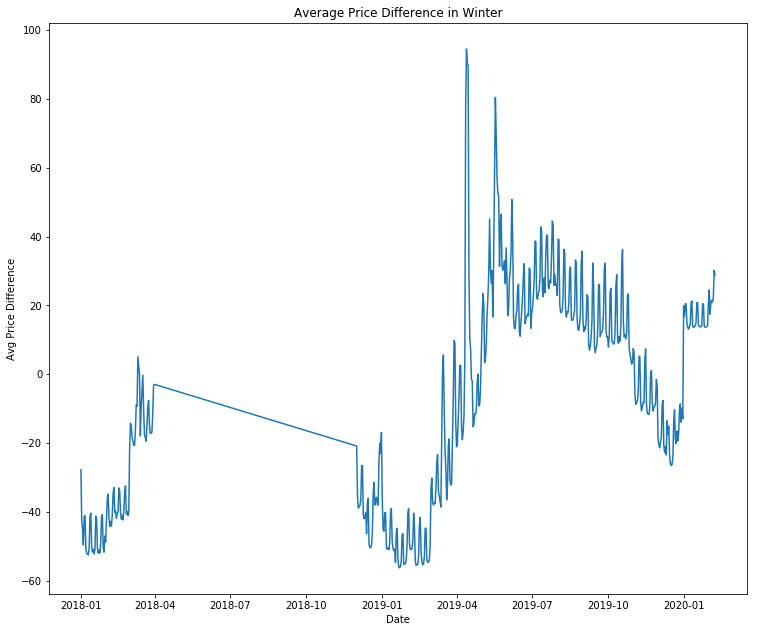

In [31]:
# WINTER 
# 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)
winter['month_year'] = winter['datetime'].dt.to_period('12M')


ax.plot(winter['datetime'],winter['price_diff'])

# ax.set_xticklabels(winter['month_year'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Winter')
winter['month_year'].unique()

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Average Price Difference in Summer')

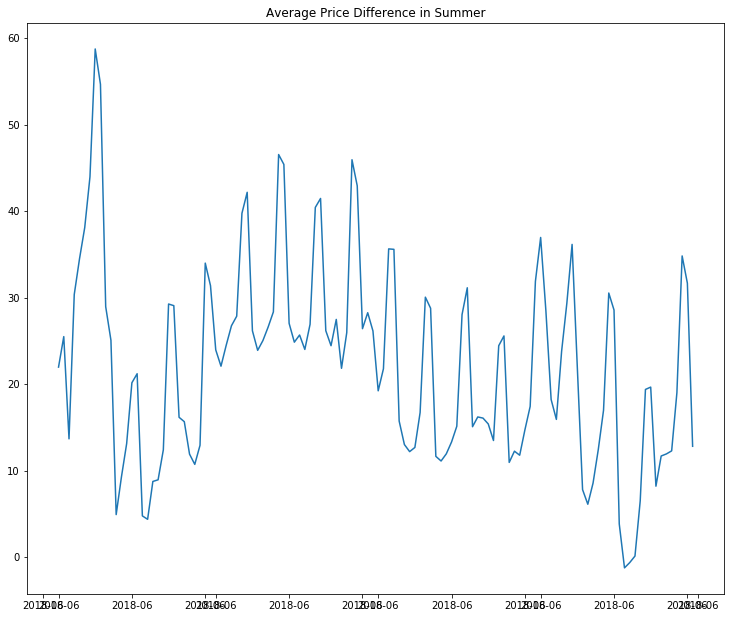

In [32]:
# SUMMER 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)
summer['month_year'] = summer['datetime'].dt.to_period('12M')

ax.plot(summer['datetime'],summer['price_diff'])
ax.set_xticklabels(summer['month_year'])

summer['month_year'].unique()
ax.set_title('Average Price Difference in Summer')

<PeriodArray>
['2018-09', '2018-10', '2018-11', '2018-12']
Length: 4, dtype: period[12M]

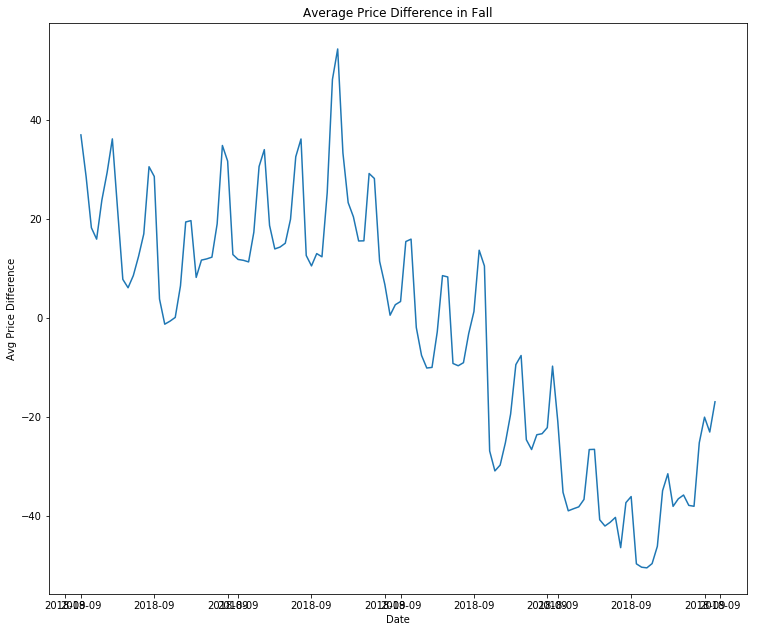

In [33]:
#FALL

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)

ax.plot(fall['datetime'],fall['price_diff'])
ax.set_xticklabels(fall['datetime'].dt.to_period('12M'))
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Fall')
fall['month_year'].unique()


<PeriodArray>
['2018-03', '2018-04', '2018-05', '2018-06']
Length: 4, dtype: period[12M]

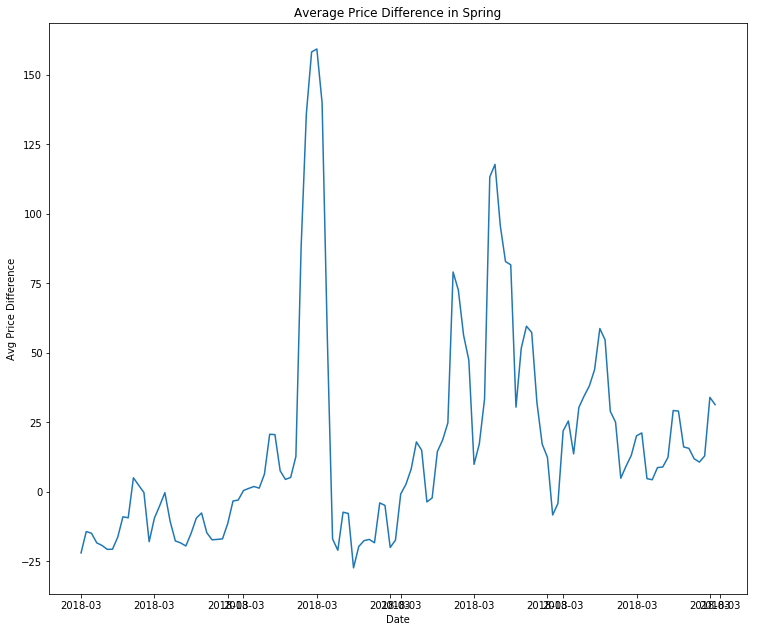

In [34]:
# SPRING

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)

ax.plot(spring['datetime'],spring['price_diff'])
ax.set_xticklabels(spring['datetime'].dt.to_period('12M'))
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Spring')
spring['month_year'].unique()


In [35]:
data=final_sums
data['month_year'] = data['datetime'].dt.to_period('12M')
# data = data[~(data['month_year'] <= '2017-10')]  
baseData=[]
baseData=data
data.head()

,datetime,price_diff,price_x,price_y,month_year
0,2015-10-02,7.371864,36.0,36.0,2015-10
1,2015-10-03,16.953006,350.0,350.0,2015-10
2,2015-10-04,3.833924,64.0,64.0,2015-10
3,2015-10-05,-0.415049,674.0,674.0,2015-10
4,2015-10-06,0.293709,560.0,560.0,2015-10


In [42]:
data.head()

,datetime,price_diff,price_x,price_y,month_year
0,2015-10-02,7.371864,36.0,36.0,2015-10
1,2015-10-03,16.953006,350.0,350.0,2015-10
2,2015-10-04,3.833924,64.0,64.0,2015-10
3,2015-10-05,-0.415049,674.0,674.0,2015-10
4,2015-10-06,0.293709,560.0,560.0,2015-10


In [46]:
# data = data[~(data['price_diff'] == 0).any(axis=1)]
# data = data[~(data['price_diff'] < 0).any(axis=1)]
data = data[data.price_diff > 0]
# data=baseData
data.head()

,datetime,price_diff,price_x,price_y,month_year
0,2015-10-02,7.371864,36.0,36.0,2015-10
1,2015-10-03,16.953006,350.0,350.0,2015-10
2,2015-10-04,3.833924,64.0,64.0,2015-10
4,2015-10-06,0.293709,560.0,560.0,2015-10
5,2015-10-07,1.433710,434.0,434.0,2015-10


In [ ]:
# final_sums.drop(columns=['maximum_nights'], inplace=True)


## KNN regression method

In [47]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [48]:
final_sums=data
data.head()

,datetime,price_diff,price_x,price_y,month_year
0,2015-10-02,7.371864,36.0,36.0,2015-10
1,2015-10-03,16.953006,350.0,350.0,2015-10
2,2015-10-04,3.833924,64.0,64.0,2015-10
4,2015-10-06,0.293709,560.0,560.0,2015-10
5,2015-10-07,1.433710,434.0,434.0,2015-10


In [49]:
 y = final_sums['price_diff']


In [50]:
final_sums.head()
X=final_sums
X.reset_index(inplace=True)
X.head()

,index,datetime,price_diff,price_x,price_y,month_year
0,0,2015-10-02,7.371864,36.0,36.0,2015-10
1,1,2015-10-03,16.953006,350.0,350.0,2015-10
2,2,2015-10-04,3.833924,64.0,64.0,2015-10
3,4,2015-10-06,0.293709,560.0,560.0,2015-10
4,5,2015-10-07,1.433710,434.0,434.0,2015-10


In [51]:
X['dateNumber']=0
X['year']=0
X['day']=0
for i in range (829):
    ts = pd.Timestamp(X['datetime'][i])
    X['dateNumber'][i]=ts.weekofyear  
    X['year'][i]=ts.year
    X['day'][i]=ts.dayofweek 
  

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [52]:
X.head()

,index,datetime,price_diff,price_x,price_y,month_year,dateNumber,year,day
0,0,2015-10-02,7.371864,36.0,36.0,2015-10,40,2015,4
1,1,2015-10-03,16.953006,350.0,350.0,2015-10,40,2015,5
2,2,2015-10-04,3.833924,64.0,64.0,2015-10,40,2015,6
3,4,2015-10-06,0.293709,560.0,560.0,2015-10,41,2015,1
4,5,2015-10-07,1.433710,434.0,434.0,2015-10,41,2015,2


In [53]:
  
# ts=[]
# ts = pd.Timestamp(X['datetime'])
# str=ts.dayofyear


# y = final_sums['price_diff']
X = final_sums.drop(columns=['price_diff'], inplace=True)
# X = final_sums.drop(columns=['month_year'], inplace=True)
X = final_sums.drop(columns=['price_x'], inplace=True)
# X.drop(columns=['level_0'], inplace=True)

X=final_sums
# X.reset_index(inplace=True)
X.head()


,index,datetime,price_y,month_year,dateNumber,year,day
0,0,2015-10-02,36.0,2015-10,40,2015,4
1,1,2015-10-03,350.0,2015-10,40,2015,5
2,2,2015-10-04,64.0,2015-10,40,2015,6
3,4,2015-10-06,560.0,2015-10,41,2015,1
4,5,2015-10-07,434.0,2015-10,41,2015,2


In [54]:
# X.drop(columns=['index'], inplace=True)

X_base=[]
X_base=X
X_base.head()

,index,datetime,price_y,month_year,dateNumber,year,day
0,0,2015-10-02,36.0,2015-10,40,2015,4
1,1,2015-10-03,350.0,2015-10,40,2015,5
2,2,2015-10-04,64.0,2015-10,40,2015,6
3,4,2015-10-06,560.0,2015-10,41,2015,1
4,5,2015-10-07,434.0,2015-10,41,2015,2


In [55]:
# X['day']=0
# for i in range (829):
#     ts = pd.Timestamp(X['datetime'][i])
#     X['day'][i]=ts.dayofyear  
    

X.drop(columns=['datetime'], inplace=True)
#  X.drop(columns=['year'], inplace=True)



In [56]:
# X_base.drop(columns=['index'], inplace=True)
X.drop(columns=['month_year'], inplace=True)
X.dtypes

index           int64
price_y       float64
dateNumber      int64
year            int64
day             int64
dtype: object

In [57]:
y.head()

0     7.371864
1    16.953006
2     3.833924
4     0.293709
5     1.433710
Name: price_diff, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=65)  

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler

rmse_val=[]

for k in range(20):
    k = k+1
#     sc = StandardScaler()  
#     X_train = sc.fit_transform(X_train)  
#     X_test = sc.transform(X_test)
    regressor = KNeighborsRegressor(n_neighbors = k) 
    regressor.fit(X_train, y_train)
    pred_test = regressor.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred_test))
    rmse_val.append(error) 
#     print('RMSE value for k= ' , k , 'is:', error)
    mape_train = np.mean(np.abs((y_train - y_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - pred_test) / y_test)) * 100
    #print('Mape_train value for k= ' , k , 'is:', mape_train)
    print('k= ' , k ,'Mape_train :', mape_train,'Mape_test :', mape_test,'RMSE:', error )
    

k=  1 Mape_train : 0.0 Mape_test : 572.0672485995395 RMSE: 18.541103521263615
k=  2 Mape_train : 0.0 Mape_test : 358.02451267458713 RMSE: 15.874670760324376
k=  3 Mape_train : 0.0 Mape_test : 384.7827592052565 RMSE: 15.714184287394788
k=  4 Mape_train : 0.0 Mape_test : 404.0346546980606 RMSE: 15.903422702329117
k=  5 Mape_train : 0.0 Mape_test : 411.0775934642094 RMSE: 16.365819006917974
k=  6 Mape_train : 0.0 Mape_test : 446.6687693514508 RMSE: 16.21039699103119
k=  7 Mape_train : 0.0 Mape_test : 511.1833086803995 RMSE: 15.931980714717408
k=  8 Mape_train : 0.0 Mape_test : 484.8469276188955 RMSE: 15.865339476137148
k=  9 Mape_train : 0.0 Mape_test : 457.75057038563716 RMSE: 15.390998372919416
k=  10 Mape_train : 0.0 Mape_test : 529.3124945683629 RMSE: 15.368536397386851
k=  11 Mape_train : 0.0 Mape_test : 564.5892782809468 RMSE: 15.416930895360977
k=  12 Mape_train : 0.0 Mape_test : 546.7486083343855 RMSE: 15.374122495576872
k=  13 Mape_train : 0.0 Mape_test : 559.0441282427628 RMSE: 

## Random Forest Regres

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

def random_forest(model, X_train, X_test, Y_train, Y_test):
#     sc = StandardScaler()  
#     X_train = sc.fit_transform(X_train)  
#     X_test = sc.transform(X_test)
    model.fit(X_train, y_train)  
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return mape_train, y_pred_test, mape_test, mse_test, rmse_test, model
def modelling(model, X_train, X_test, y_train, y_test):
#     sc = StandardScaler()  
#     X_train = sc.fit_transform(X_train)  
#     X_test = sc.transform(X_test)
    model.fit(X_train, y_train)  
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return [mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test]    

In [61]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()  
print(regressor)
mape_train, y_pred_test, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', mape_train,'\nMAPE for test is: ', mape_test,'\nMSE for test is: ', mse_test, '\nRMSE for test is: ', rmse_test)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MAPE for train is:  46.1911756084659 
MAPE for test is:  728.2273391577434 
MSE for test is:  130.8225601018645 
RMSE for test is:  11.437769017682797


/anaconda2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
X_feat = data.values
Y_feat = y.values
print(kf) 


KFold(n_splits=5, random_state=None, shuffle=False)


In [63]:

for n in range(2,8):
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    X_feat = data.values
    Y_feat = y.values

    max_depth_list = [1,3,4,5,6,7,8,10,11,20]
    for depth in max_depth_list:
        MAPE_TEST = []  
        MAPE_TRAIN =[]
        regressor = RandomForestRegressor(n_estimators=10, max_depth= depth, criterion="mae") 

        for i, j in kf.split(data):
            X_train, X_test = X_feat[i], X_feat[j]
            y_train, y_test = Y_feat[i], Y_feat[j]
            mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test = modelling(regressor,X_train, X_test, y_train, y_test)
    #         print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)
            MAPE_TEST.append(mape_test)
            MAPE_TRAIN.append(mape_train)
            
            print("KF = ",n," Depth = ",depth,"MAPE_train = ",(mape_train),"MAPE_test = ",(mape_test),"\t MAE = ",(mae_test),"\t RMSE = ", (rmse_test))
    #         if(mae_test<15):
    #             print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)

    #print("depth = ",depth, MAPE_TEST)

KF =  2  Depth =  1 MAPE_train =  278.2042035594487 MAPE_test =  1226.971668172544 	 MAE =  14.221569555675213 	 RMSE =  16.11918360092605
KF =  2  Depth =  1 MAPE_train =  256.5208985821941 MAPE_test =  162.39914695700065 	 MAE =  14.062353658912924 	 RMSE =  23.72316493726386
KF =  2  Depth =  3 MAPE_train =  289.375867133016 MAPE_test =  1573.2764031088484 	 MAE =  24.924838729633585 	 RMSE =  29.769991269528834
KF =  2  Depth =  3 MAPE_train =  162.76349032317438 MAPE_test =  176.06372468065592 	 MAE =  13.35645908208574 	 RMSE =  22.714519962831677
KF =  2  Depth =  4 MAPE_train =  225.73152239557777 MAPE_test =  1229.4121351115398 	 MAE =  26.01399558997084 	 RMSE =  33.045390007104345
KF =  2  Depth =  4 MAPE_train =  158.45910702709102 MAPE_test =  145.00594368039788 	 MAE =  14.713714923406767 	 RMSE =  23.991648122820816
KF =  2  Depth =  5 MAPE_train =  255.85797711499904 MAPE_test =  2287.716449566638 	 MAE =  36.36420420791657 	 RMSE =  42.1552212857019
KF =  2  Depth =  5

KF =  4  Depth =  4 MAPE_train =  260.6995179139367 MAPE_test =  237.17010229125245 	 MAE =  10.773267325927662 	 RMSE =  12.80023297576432
KF =  4  Depth =  4 MAPE_train =  131.73337991700265 MAPE_test =  514.2010189085382 	 MAE =  16.56052335135281 	 RMSE =  28.150019342122988
KF =  4  Depth =  4 MAPE_train =  240.34973092069708 MAPE_test =  53.65647023663113 	 MAE =  8.409063168378314 	 RMSE =  11.631955810262497
KF =  4  Depth =  5 MAPE_train =  198.07524475461867 MAPE_test =  1553.7258001449586 	 MAE =  11.758125640398292 	 RMSE =  12.527213062884742
KF =  4  Depth =  5 MAPE_train =  217.8153572557238 MAPE_test =  208.0492634200793 	 MAE =  8.08069461349237 	 RMSE =  11.146821402919347
KF =  4  Depth =  5 MAPE_train =  96.81442848484969 MAPE_test =  504.7930738586888 	 MAE =  17.36065444864567 	 RMSE =  29.202295214785657
KF =  4  Depth =  5 MAPE_train =  254.31814699700598 MAPE_test =  76.84584322833969 	 MAE =  7.798108227943666 	 RMSE =  10.640528505366895
KF =  4  Depth =  6 M

KF =  5  Depth =  8 MAPE_train =  129.61960664117748 MAPE_test =  211.2037623242313 	 MAE =  3.3256419078987998 	 RMSE =  7.5658716111420725
KF =  5  Depth =  8 MAPE_train =  174.4230690902359 MAPE_test =  167.5133243350314 	 MAE =  10.395479024765018 	 RMSE =  13.80376814311867
KF =  5  Depth =  8 MAPE_train =  137.60689641261018 MAPE_test =  178.62138647333109 	 MAE =  13.601686775432041 	 RMSE =  23.489797503720855
KF =  5  Depth =  8 MAPE_train =  62.32656576419134 MAPE_test =  1136.9195542292669 	 MAE =  13.588890806089546 	 RMSE =  24.360522291936093
KF =  5  Depth =  8 MAPE_train =  138.27841724249402 MAPE_test =  73.654331670802 	 MAE =  5.49292837805094 	 RMSE =  6.762360929831842
KF =  5  Depth =  10 MAPE_train =  106.8000924189518 MAPE_test =  317.4397898082665 	 MAE =  3.4440496719120692 	 RMSE =  7.499520471617983
KF =  5  Depth =  10 MAPE_train =  114.3760647987907 MAPE_test =  229.84771662701635 	 MAE =  12.318755867545512 	 RMSE =  17.046348812181364
KF =  5  Depth =  1

KF =  6  Depth =  8 MAPE_train =  105.38225878007992 MAPE_test =  60.05164427206997 	 MAE =  17.529706854135032 	 RMSE =  30.05176168000448
KF =  6  Depth =  8 MAPE_train =  60.17341025957087 MAPE_test =  814.5787486766354 	 MAE =  10.79770019734815 	 RMSE =  17.904555058023742
KF =  6  Depth =  8 MAPE_train =  180.7326770315101 MAPE_test =  139.62112407811975 	 MAE =  8.894900788215331 	 RMSE =  10.472686815965439
KF =  6  Depth =  10 MAPE_train =  86.14536821985219 MAPE_test =  87.30754938694622 	 MAE =  3.4588990491132723 	 RMSE =  8.179963550572708
KF =  6  Depth =  10 MAPE_train =  153.9043032124843 MAPE_test =  203.74240946831904 	 MAE =  6.530921235620486 	 RMSE =  10.498235828160139
KF =  6  Depth =  10 MAPE_train =  88.10917300162366 MAPE_test =  126.43811235440255 	 MAE =  7.80811230468223 	 RMSE =  11.48421516541428
KF =  6  Depth =  10 MAPE_train =  99.67786384505447 MAPE_test =  64.68037197728465 	 MAE =  17.642323013782992 	 RMSE =  31.190706383006617
KF =  6  Depth =  10

KF =  7  Depth =  7 MAPE_train =  155.91005033149062 MAPE_test =  112.15254924466194 	 MAE =  7.868482754942182 	 RMSE =  9.905800770352815
KF =  7  Depth =  7 MAPE_train =  72.8272174331267 MAPE_test =  1697.6336900743302 	 MAE =  14.267291321864535 	 RMSE =  21.709804939751375
KF =  7  Depth =  7 MAPE_train =  199.6480439215552 MAPE_test =  151.69161774569747 	 MAE =  8.749516523788355 	 RMSE =  10.402017069015978
KF =  7  Depth =  8 MAPE_train =  153.13825751329097 MAPE_test =  97.67086636795813 	 MAE =  3.871514401135857 	 RMSE =  8.723429746269295
KF =  7  Depth =  8 MAPE_train =  145.14211050171346 MAPE_test =  158.39659070838619 	 MAE =  5.385180431393894 	 RMSE =  8.117892452337939
KF =  7  Depth =  8 MAPE_train =  126.31699398746854 MAPE_test =  307.67473713471577 	 MAE =  16.709485524058827 	 RMSE =  21.29759185903384
KF =  7  Depth =  8 MAPE_train =  108.2384487841701 MAPE_test =  274.11489060277165 	 MAE =  16.8012864377884 	 RMSE =  27.92822938574614
KF =  7  Depth =  8 MA

In [64]:
kf = KFold(n_splits=7)
kf.get_n_splits(X)
X_feat = data.values
Y_feat = y.values

max_depth_list = [10,12,14,18,20,25,27]
for depth in max_depth_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    regressor = RandomForestRegressor(n_estimators=10, max_depth= depth, criterion="mae") 

    for i, j in kf.split(data):
        X_train, X_test = X_feat[i], X_feat[j]
        y_train, y_test = Y_feat[i], Y_feat[j]
        mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test = modelling(regressor,X_train, X_test, y_train, y_test)
    #         print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)
        MAPE_TEST.append(mape_test)
        MAPE_TRAIN.append(mape_train)
        if(mape_test< 0.4 ):
            print("KF = ",n," Depth = ",depth,"MAPE Train = ",(mape_train),"MAPE Test= ",(mape_test),"\t MAE = ",(mae_test),"\t RMSE = ", (rmse_test))
    #         if(mae_test<15):
    #             print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)

    #print("depth = ",depth, MAPE_TEST)

In [65]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 

n_estimator_list = [10,15,20,25,30,50,60]
for est in n_estimator_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    mat=[]
    regressor = RandomForestRegressor(max_depth= 20,n_estimators = est) 

    for i, j in kf.split(X_feat):
        X_train, X_test = X_feat[i], X_feat[j]
        y_train, y_test = Y_feat[i], Y_feat[j]
        result = modelling(regressor,X_train, X_test, y_train, y_test)
    MAPE_TEST.append(result[1])
    MAPE_TRAIN.append(result[0])
    
    print("estimator = ",est, MAPE_TEST)
    

KFold(n_splits=5, random_state=None, shuffle=False)
estimator =  10 [154.9733263329999]
estimator =  15 [126.56605648871341]
estimator =  20 [63.62052734927352]
estimator =  25 [95.60301061698642]
estimator =  30 [121.14319360511914]
estimator =  50 [104.32468669384407]
estimator =  60 [129.9914548398404]


## Grid-search for Random Forest Regressor to find the best parameters

In [66]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
regressor = RandomForestRegressor() 
param_grid = {"n_estimators": [20,25,30,40,200],
              "criterion":['mse','mae'],
              "max_features": ['auto', 'sqrt', 'log2'],
             "max_depth": [1,5,10,15]}

grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print(grid_search.score)

KFold(n_splits=5, random_state=None, shuffle=False)
<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 25, 30, 40, 200], 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>


/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
grid_search.best_params_


{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 40}

In [68]:
grid_search.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 25, 30, 40, 200], 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [69]:


for n in range(2,8):
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    X_feat = data.values
    Y_feat = y.values

    max_depth_list = [1,7,8,10,20,25]
    for depth in max_depth_list:
        MAPE_TEST = []  
        MAPE_TRAIN =[]
        regressor = RandomForestRegressor(criterion= 'mse', max_depth= 15, max_features= 'auto', n_estimators= 40) 

        for i, j in kf.split(data):
            X_train, X_test = X_feat[i], X_feat[j]
            y_train, y_test = Y_feat[i], Y_feat[j]
            mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test = modelling(regressor,X_train, X_test, y_train, y_test)
    #         print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)
            MAPE_TEST.append(mape_test)
            MAPE_TRAIN.append(mape_train)
            print("KF = ",n," Depth = ",depth,"MAPE Train = ",(mape_train),"MAPE Test = ",(mape_test),"\t MAE = ",(mae_test),"\t RMSE = ",(rmse_test))



KF =  2  Depth =  1 MAPE Train =  88.87728245067804 MAPE Test =  1016.6317541674298 	 MAE =  12.168337889094047 	 RMSE =  14.790872360556218
KF =  2  Depth =  1 MAPE Train =  44.561088117174634 MAPE Test =  167.76955182765755 	 MAE =  14.094307907768378 	 RMSE =  22.874849953507177
KF =  2  Depth =  7 MAPE Train =  70.61610532403964 MAPE Test =  1737.2860260252764 	 MAE =  27.62211897391487 	 RMSE =  31.827468746881436
KF =  2  Depth =  7 MAPE Train =  43.267571952548316 MAPE Test =  216.12660215836166 	 MAE =  13.598353083447272 	 RMSE =  21.80874559257402
KF =  2  Depth =  8 MAPE Train =  77.1682698424629 MAPE Test =  1405.8638203849086 	 MAE =  17.67410227548432 	 RMSE =  20.182472038654137
KF =  2  Depth =  8 MAPE Train =  53.92185616685903 MAPE Test =  181.1484998210821 	 MAE =  14.253326029316202 	 RMSE =  22.818202868257877
KF =  2  Depth =  10 MAPE Train =  116.74428213843817 MAPE Test =  1675.1102821687152 	 MAE =  25.56823894635014 	 RMSE =  29.152999372363286
KF =  2  Depth 

KF =  5  Depth =  7 MAPE Train =  76.57391795423322 MAPE Test =  147.53830941146077 	 MAE =  2.8300912146419495 	 RMSE =  6.518148635599336
KF =  5  Depth =  7 MAPE Train =  77.4408342805002 MAPE Test =  184.4549754304049 	 MAE =  11.281717094593064 	 RMSE =  14.251507639325581
KF =  5  Depth =  7 MAPE Train =  69.22471295745429 MAPE Test =  120.54364109823916 	 MAE =  11.53658088525362 	 RMSE =  20.240857889443046
KF =  5  Depth =  7 MAPE Train =  34.420762557115914 MAPE Test =  623.5971875906663 	 MAE =  10.567748995923916 	 RMSE =  15.405472625233585
KF =  5  Depth =  7 MAPE Train =  74.67722155363818 MAPE Test =  127.41219008402598 	 MAE =  8.637087814060145 	 RMSE =  11.432493711219783
KF =  5  Depth =  8 MAPE Train =  69.36330847864079 MAPE Test =  197.7445277704497 	 MAE =  2.9488414938186995 	 RMSE =  6.578145839595755
KF =  5  Depth =  8 MAPE Train =  65.20703394478056 MAPE Test =  179.5919402499321 	 MAE =  10.761533845824635 	 RMSE =  13.497717622933147
KF =  5  Depth =  8 M

KF =  7  Depth =  1 MAPE Train =  77.08034267839089 MAPE Test =  100.32546283764718 	 MAE =  3.8133711497862945 	 RMSE =  8.688673079627126
KF =  7  Depth =  1 MAPE Train =  80.69827985369392 MAPE Test =  133.9086677926447 	 MAE =  5.1998209187128355 	 RMSE =  8.196809480642859
KF =  7  Depth =  1 MAPE Train =  71.93276500648906 MAPE Test =  278.10790097417043 	 MAE =  16.009193845666957 	 RMSE =  20.49722354999218
KF =  7  Depth =  1 MAPE Train =  64.58376109726797 MAPE Test =  185.97592552026907 	 MAE =  15.314084186320482 	 RMSE =  24.854424709033736
KF =  7  Depth =  1 MAPE Train =  50.268660176725334 MAPE Test =  105.49184962294682 	 MAE =  8.449102713984217 	 RMSE =  10.524022240360676
KF =  7  Depth =  1 MAPE Train =  36.062818535630505 MAPE Test =  907.8658658608143 	 MAE =  10.74863554971704 	 RMSE =  16.12003794794447
KF =  7  Depth =  1 MAPE Train =  56.510851422441064 MAPE Test =  193.05873714805188 	 MAE =  11.459606630789615 	 RMSE =  13.879997388643218
KF =  7  Depth =  

In [70]:
rfModel= RandomForestRegressor(criterion= 'mse', max_depth= 15, max_features= 'auto', n_estimators= 40)
result = modelling(rfModel, X_train, X_test, y_train, y_test)
predicted = result[6]
print('y_pred:', result[6])

y_pred: [18.96303134 17.30804321 18.88525677 34.11565646 34.86424382 21.5284488
 18.37299623 17.36775229 17.73386133 16.62257445 34.50741692 34.92671227
 20.98561462 18.0521261  18.26628108 17.49986131 19.4690365  34.71102404
 33.13394455 18.02984439 19.45544825 17.89455403 17.96502246 17.14069295
 33.92270067 33.93241022 20.08770214 16.64625073 16.75398105 17.09951254
 19.89175897 34.49632188 34.63204359 15.49969567 16.81442506 16.18413316
 17.29904626 20.5804669  34.22319715 33.48414564 19.34619465 16.99190787
 18.30027884 16.63581329 20.14549564 35.89547754 33.69683719 19.58291076
 16.72197558 16.65787448 16.57516805 18.40037557 34.64063556 33.82781027
 18.66768669 16.3951567  17.46732142 16.10842981 18.50824171 35.29525015
 35.24201849 18.43552262 23.71029384 24.85382681 24.85382681 23.71029384
 23.59994567 29.41450204 25.86258726 23.59994567 25.33326076 29.48713979
 33.41350381 26.59460949 29.08515537 24.85382681 26.15486044 25.33326076
 25.86258726 26.42465603 25.56927194 25.6192

## Using Decision Tree Regressor

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
model1 =DecisionTreeRegressor()
print(model1)
metrices_list = modelling(model1,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', str(metrices_list[0]),',MAPE for test is: ', str(metrices_list[1]),
      ',MAE for train is: ', str(metrices_list[2]),',MAE for test is: ', str(metrices_list[3]), 
      ',MSE for test is: ', str(metrices_list[4]),',RMSE for test is: ',str(metrices_list[5]))


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
MAPE for train is:  0.0 ,MAPE for test is:  180.92651662804872 ,MAE for train is:  0.0 ,MAE for test is:  10.443726821612804 ,MSE for test is:  166.5049197371741 ,RMSE for test is:  12.903678535098978


### Using grid-search to find the best parameters


In [72]:
def bestParameters():
        #regressor = tree.DecisionTreeRegressor() 

        # Set the parameters by cross-validation
        tuned_parameters = [{'max_features': ['sqrt', 'log2', None],
                             'max_depth': range(11,20,60),
                             }
                            ]


        reg = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5)
        reg.fit(X_train, y_train)

        print ("Best parameters set found on development set:\n")
        print (reg.best_params_)

        
bestParameters()

Best parameters set found on development set:

{'max_depth': 11, 'max_features': 'log2'}


/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Using best parameters to calculate the mape using Decision Tree Regressor

In [73]:
decisionTreeModel = DecisionTreeRegressor(max_features=None, max_depth = 40)

metrices_list = modelling(decisionTreeModel,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', str(metrices_list[0]),',MAPE for test is: ', str(metrices_list[1]),
      ',MAE for train is: ', str(metrices_list[2]),',MAE for test is: ', str(metrices_list[3]), 
      ',MSE for test is: ', str(metrices_list[4]),',RMSE for test is: ',str(metrices_list[5]))


MAPE for train is:  0.0 ,MAPE for test is:  131.97987513044566 ,MAE for train is:  0.0 ,MAE for test is:  6.523921517642829 ,MSE for test is:  67.83950048684078 ,RMSE for test is:  8.236473789604432


## KNN Neighbors

In [74]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor() 
print(regressor)
metrices = modelling(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', str(metrices[0]),',MAPE for test is: ', str(metrices[1]),
      ',MAE for train is: ', str(metrices[2]),',MAE for test is: ', str(metrices[3]), 
      ',MSE for test is: ', str(metrices[4]),',RMSE for test is: ',str(metrices[5]))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
MAPE for train is:  275.50911847982496 ,MAPE for test is:  193.6049769600727 ,MAE for train is:  8.14174884966752 ,MAE for test is:  12.054511124218557 ,MSE for test is:  188.60425463710558 ,RMSE for test is:  13.733326422870228



## Pickling the final model

In [75]:
import pickle
ran_for = open('RFModelSurge.pkl', 'wb')
pickle.dump(rfModel, ran_for)
print(ran_for)
ran_for.close()

decision_tree = open('DTModelSurge.pkl', 'wb')
pickle.dump(decisionTreeModel, decision_tree)
print(decision_tree)
decision_tree.close()


<_io.BufferedWriter name='RFModelSurge.pkl'>
<_io.BufferedWriter name='DTModelSurge.pkl'>


## Scores

 Random Forest:  MAPE = 56.72 MAE = 17.58

Decision Tree:  MAPE=131.979  MAE= 6.523    

KNN Neighbours:     MAPE =193.60  MAE =  8.141

<table class='table table-striped'> <thead> <tr> <th>Model</th> <th>Interpretable</th> <th>Reproducible</th></tr> </thead> 
<tbody><tr> <th scope='row'>Random Forest Regressor</th> <td>No</td> <td>Yes</td></tr>
<tr> <th scope='row'>Decision Tree Regressor</th><td>Yes</td><td>Yes</td></tr>
<tr> <th scope='row'>KNN Regressor</th> <td>No</td> <td>Yes</td></tr></tbody> </table>

In [80]:
import pandas as pd

pickle_in = open('RFModelSurge.pkl', 'rb')
RFmodel = pickle.load(pickle_in)


pickle_in.close()


## Creating function to predict the price from the pickled model

In [81]:
df=[400, 40, 2015, 4]
def predict_surge_RF(df):
    return RFmodel.predict(df)


In [78]:
predicted

array([18.96303134, 17.30804321, 18.88525677, 34.11565646, 34.86424382,
       21.5284488 , 18.37299623, 17.36775229, 17.73386133, 16.62257445,
       34.50741692, 34.92671227, 20.98561462, 18.0521261 , 18.26628108,
       17.49986131, 19.4690365 , 34.71102404, 33.13394455, 18.02984439,
       19.45544825, 17.89455403, 17.96502246, 17.14069295, 33.92270067,
       33.93241022, 20.08770214, 16.64625073, 16.75398105, 17.09951254,
       19.89175897, 34.49632188, 34.63204359, 15.49969567, 16.81442506,
       16.18413316, 17.29904626, 20.5804669 , 34.22319715, 33.48414564,
       19.34619465, 16.99190787, 18.30027884, 16.63581329, 20.14549564,
       35.89547754, 33.69683719, 19.58291076, 16.72197558, 16.65787448,
       16.57516805, 18.40037557, 34.64063556, 33.82781027, 18.66768669,
       16.3951567 , 17.46732142, 16.10842981, 18.50824171, 35.29525015,
       35.24201849, 18.43552262, 23.71029384, 24.85382681, 24.85382681,
       23.71029384, 23.59994567, 29.41450204, 25.86258726, 23.59

In [79]:
y_test

array([18.16832558, 17.93742776, 20.59493963, 30.30892635, 31.13481382,
       16.22480769, 15.61472416, 15.8391912 , 17.14518451, 18.97702449,
       33.19516541, 32.03421074, 16.27545454, 13.05508496, 12.77662946,
       14.48433587, 17.80544178, 32.32970662, 35.78760932, 16.20527653,
       12.34451572, 13.8557957 , 13.02073085, 15.87676298, 23.09712434,
       22.55068266,  8.55948012,  7.00496248,  8.28411905, 10.89614957,
       15.89823013, 32.25982025, 25.38146083,  7.93546843,  6.22456368,
        7.76755864,  8.68657054, 13.16932826, 26.02233012, 26.11023435,
       10.94017996, 12.09052289, 12.245287  , 12.96235517, 18.03685333,
       30.97426324, 32.29383032, 12.4600292 , 10.78335122, 10.80946187,
        7.90047377, 11.89179771, 24.01240471, 24.90864354,  9.67687544,
        9.47729452,  8.84222522,  8.81295515, 12.75389732, 25.87433645,
       28.90439444, 10.42397919,  9.00405935, 10.95037216,  9.59294296,
       14.10342077, 31.42882513, 36.24054671, 15.47710871, 10.89